# Présentation du TP sur la classification de films

L'objectif de ce TP est d'identifier le genre d'un film à partir de son résumé.

Le TP se fera en binôme et le notebook sera à déposer sur madoc pour le **vendredi 08/04/2022**.

## 1. Pré-traitement et visualisation des données 

Les données correspondent aux 1000 films les plus populaires d'IMDB, entre 2006 et 2016 ([imdb-data](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data)).  

Dans cette première partie du TP, vous devrez récupérer les données et les stocker dans un dataframe puis effectuer quelques visualisations de celles-ci.

### Import des données dans un dataframe


In [2]:
import pandas as pd
df = pd.read_csv ('./data/IMDB-Movie-Data.csv')

### Affichage des 10 premiers films


In [3]:
print(df[:10])

   Rank                    Title                       Genre  \
0     1  Guardians of the Galaxy     Action,Adventure,Sci-Fi   
1     2               Prometheus    Adventure,Mystery,Sci-Fi   
2     3                    Split             Horror,Thriller   
3     4                     Sing     Animation,Comedy,Family   
4     5            Suicide Squad    Action,Adventure,Fantasy   
5     6           The Great Wall    Action,Adventure,Fantasy   
6     7               La La Land          Comedy,Drama,Music   
7     8                 Mindhorn                      Comedy   
8     9       The Lost City of Z  Action,Adventure,Biography   
9    10               Passengers     Adventure,Drama,Romance   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Ni

### Affichage du nombre de films de chaque genre

Certains films sont associés à plusieurs genres : ils devront donc être comptabilisés dans chacun des genres (un genre est représenté par un seul mot).

In [4]:
genreArr = []
for genres in df['Genre'].unique():
    for genre in genres.split(","):
        if(genre not in genreArr):
            genreArr.append(genre)

for genre in genreArr:
    print(genre+" : "+str(df['Genre'].apply(lambda x: genre in x.split(',')).value_counts()[True]))

Action : 303
Adventure : 259
Sci-Fi : 120
Mystery : 106
Horror : 119
Thriller : 195
Animation : 49
Comedy : 279
Family : 51
Fantasy : 101
Drama : 513
Music : 16
Biography : 81
Romance : 141
History : 29
Crime : 150
Western : 7
War : 13
Musical : 5
Sport : 18


### Affichage du nombre de films par genre et par année

Afficher un histogramme donnant la répartition du nombre de films par genre, pour chaque année.

[[11, 12, 24, 14, 25, 20, 21, 29, 37, 35, 75], [13, 11, 11, 18, 23, 18, 18, 22, 30, 33, 62], [7, 5, 6, 7, 5, 12, 8, 16, 17, 17, 20], [8, 7, 4, 8, 8, 8, 5, 13, 13, 12, 20], [4, 11, 4, 7, 8, 3, 5, 13, 8, 11, 45], [10, 10, 10, 8, 11, 14, 12, 17, 16, 27, 60], [2, 3, 2, 4, 5, 2, 2, 3, 4, 4, 18], [12, 10, 12, 14, 18, 19, 21, 23, 30, 37, 83], [1, 8, 2, 4, 6, 3, 1, 2, 4, 8, 12], [6, 7, 6, 9, 8, 10, 7, 11, 7, 7, 23], [26, 28, 22, 23, 26, 30, 28, 44, 50, 74, 162], [1, 2, 1, 0, 0, 1, 1, 1, 2, 4, 3], [3, 4, 4, 3, 4, 2, 2, 10, 6, 12, 31], [4, 4, 12, 8, 7, 16, 11, 13, 18, 18, 30], [1, 2, 2, 0, 0, 0, 3, 1, 1, 5, 14], [7, 13, 8, 5, 8, 5, 9, 19, 14, 21, 41], [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2], [2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 3], [0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0], [3, 0, 1, 1, 0, 2, 0, 1, 1, 4, 5]]


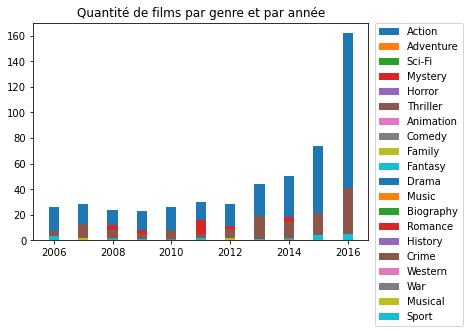

In [22]:
import matplotlib.pylab as plt

labels = range(2006,2016+1)
plotValue = []

for genreI in range(len(genreArr)):
    plotValue.append([])

for annee in range(2006,2016+1):
    smalldf = df[df["Year"] == annee]

    for genreI in range(len(genreArr)):
        try :
            plotValue[genreI].append(smalldf['Genre'].apply(lambda x: genreArr[genreI] in x.split(',')).value_counts()[True])
        except :
            plotValue[genreI].append(0)

print(plotValue)

labels = range(2006,2016+1)
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

for plotI in range(len(plotValue)):
    ax.bar(labels, plotValue[plotI], width, label=genreArr[plotI])

ax.set_title('Quantité de films par genre et par année')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()


### Création d'un dataframe contenant uniquement le titre du film, son résumé ainsi que son genre

In [26]:
small_df = df[['Title','Genre','Description']]
print(small_df)

                       Title                     Genre  \
0    Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1                 Prometheus  Adventure,Mystery,Sci-Fi   
2                      Split           Horror,Thriller   
3                       Sing   Animation,Comedy,Family   
4              Suicide Squad  Action,Adventure,Fantasy   
..                       ...                       ...   
995     Secret in Their Eyes       Crime,Drama,Mystery   
996          Hostel: Part II                    Horror   
997   Step Up 2: The Streets       Drama,Music,Romance   
998             Search Party          Adventure,Comedy   
999               Nine Lives     Comedy,Family,Fantasy   

                                           Description  
0    A group of intergalactic criminals are forced ...  
1    Following clues to the origin of mankind, a te...  
2    Three girls are kidnapped by a man with a diag...  
3    In a city of humanoid animals, a hustling thea...  
4    A secret gove


## 2. Classification binaire d'un genre de film choisi

Vous devrez tout d'abord choisir un genre de films parmi ceux présents dans les données. L'objectif sera ensuite de créer un classifieur permettant d'indiquer si un film appartient au genre choisi, en utilisant la description du film.

### Ajout d'une colonne correspondant à l'appartenance ou non du film au genre choisi

Le genre choisi pour la suite est **indiquer ici le genre choisi**.

Si le film appartient à ce genre, il aura la valeur 1 dans cette nouvelle colonne et il aura la valeur 0 dans le cas contraire.

### Séparation des données en un ensemble d'apprentissage (80% des données) et un ensemble de test (20% des données)
Les classes devront être équilibrées, c'est-à-dire que le genre choisi doit avoir la même représentativité, dans l'ensemble d'apprentissage et dans l'ensemble de test.

### Identification des 10 mots les plus caractéristiques du genre choisi (mots les plus fréquents pour le genre choisi et qui apparaissent peu ou pas dans les descriptions des films des autres genres) 

### Créer une nouvelle représentation des données, dans un nouveau dataframe, en indiquant le nombre d'occurrences de chaque mot caractéristique du genre, dans le résumé du film
Chaque film sera ainsi décrit par une colonne indiquant son nom, une colonne indiquant s'il appartient ou non au genre choisi et autant de colonnes que de mots caractéristiques (l'en-tête de chacune de ces colonnes sera le mot choisi et, pour chaque ligne correspondant à un film, on aura le nombre d'occurrences du mot dans le résumé du film correspondant).

### Test de différents classifieurs pour identifier le genre de film choisi (k-plus-proches-voisins, SVM, classification naïve de Bayes...).

Vous afficherez les performances et la matrice de confusion pour le meilleur classifieur de chaque type. Vous pourrez également utiliser de la validation croisée.

## 3. Utilisation d'autres caractéristiques pour représenter les films (pour aller plus loin et avoir plus de points)

Vous avez décrit les films par les 10 mots les plus représentatifs du genre choisi mais les films pourraient être décrits par d'autres caractéristiques (voir le fichier "chapter4_BuildingAFakeNewsClassifier.pdf", par exemple). Vous pouvez reprendre la partie précédente, en utilisation une représentation des films qui prend en compte l'ensemble des mots de leur résumé, après d'éventuels pré-traitements sur les mots (voir "spacy_cheatSheet.pdf" et le site web de [spaCy](https://spacy.io)).